Escolhemos o Mercosul e a União Europeia para realizar a APS3. [falar que o texto ta distribuido]

# Questão 1

O Mercosul foi criado em 1991, do qual inicialmente faziam parte somente Argentina, Brasil, Paraguai e Uruguai. Seu objetivo era de aumentar a oferta de emprego, intensificar relações econômicas e melhorar produtividade.
Para realizar tal feito, sua meta era fazer uma TEC (Tarifa Externa Comum), para assim criar um imposto único a todos os produtos importados, e portanto uma união aduaneira.

A União Européia foi criada em 1993, da qual inicialmente faziam parte somente Alemanha, Bélgica, Dinamarca, Espanha, França, Grécia, Irlanda, Itália, Luxemburgo, Países Baixos, Portugal, Reino Unido e Suécia.
Esses países se uniram com o objetivo de promover a paz, a prosperidade e a liberdade, e também para criar um mercado comum interno, com livre circulação de mercadorias, serviços, capitais e pessoas, além de promover coesão geral do território europeu, e ainda uma união monetária para facilitar relações comerciais.

# Questão 2

In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [3]:
# Inicialização e preparação dos dados para manipulação
pd.set_option('display.max_columns', None)
df = pd.read_csv('GfSD\SDGData.csv', sep=',',decimal='.', skiprows=0)
df = df.set_index('Indicator Name')

# Indicador escolhido nas entregas anteriores
df = df.loc['Share of youth not in education, employment or training, total (% of youth population)']

# Preparação dos anos, e países por bloco
years = [str(i) for i in range(2000,2021)]
country_names = {
    'MERCOSUL' : ['Brazil','Argentina','Paraguay','Uruguay','Venezuela, RB','Chile','Peru','Colombia','Ecuador','Guyana','Suriname'] ,
    'UE' : ['Austria', 'Belgium', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden'],
}

In [4]:
# Tratando e dividindo o dataset

df = df.set_index('Country Name')

df_mercosul = df.loc[country_names['MERCOSUL']]
df_eu = df.loc[country_names['UE']]

In [5]:
# Determinando um critério por meio do cálculo de uma distribuição normal para cada país

# Escolhemos o ano de 2020 por ser o mais próximo do ano atual (2022)
mean = df['2020'].mean()
std = df['2020'].std()

z = (df['2020'] - mean)/std
w = 2
filtro = (z < w) * (z > -w)
x = df['2020'][filtro]

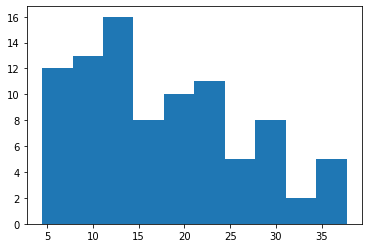

In [6]:
# Plotando um gráfico para visualização dos dados
plt.figure()
plt.hist(x)
plt.show()

De acordo com os resultados obtidos, constatamos que para o ano de 2020, não há grandes disparidades na amostra que estamos analisando, permitindo que adotemos a média como critério de classificação entre países 'avançados' e 'atrasados'.

In [7]:
# Definindo o critério por código
criterio_avancado_mundial = z < z.mean()
criterio_atrasado_mundial = z >= z.mean()

# Probabilidades de cada bloco ser avançado ou atrasado de acordo com o critério mundial
P_avancado_mundial = criterio_avancado_mundial.value_counts()[True]/criterio_avancado_mundial.value_counts().sum()
P_atrasado_mundial = criterio_avancado_mundial.value_counts()[True]/criterio_avancado_mundial.value_counts().sum()


In [8]:
# Além de calcular esse critério para o mundo, vamos calcular para cada bloco. Isso será usado nas questões posteriores


# MERCOSUL
mean = df_mercosul['2020'].mean()
std = df_mercosul['2020'].std()

z = (df_mercosul['2020'] - mean)/std
w = 2
filtro = z < w
x = df_mercosul['2020'][filtro]
filtro = z > -w
x = x[filtro]

criterio_avancado_mercosul = z < z.mean()
criterio_atrasado_mercosul = z >= z.mean()


# UE
mean = df_eu['2020'].mean()
std = df_eu['2020'].std()

z = (df_eu['2020'] - mean)/std
w = 2
filtro = z < w
x = df_eu['2020'][filtro]
filtro = z > -w
x = x[filtro]

criterio_avancado_eu = z < z.mean()
criterio_atrasado_eu = z >= z.mean()

Lista dos países de cada bloco com suas respectivas classificações (True = avançado, False = atrasado; vale lembrar que nosso indicador é mais favorável quanto mais baixo seu valor for):

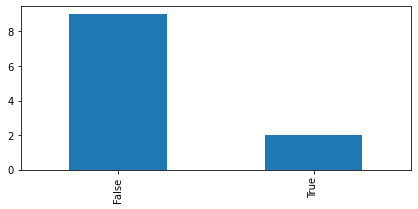

In [21]:
c = criterio_avancado_mercosul.value_counts()
# b = criterio_avancado_eu.value_counts()
c.plot.bar(stacked=False, figsize=(7,3))
# b.plot.bar(stacked=False, figsize=(7,3))
plt.ylabel('')
plt.xlabel('')
plt.show()

# Questão 3

In [11]:
P_avancado_eu = criterio_avancado_eu.value_counts()[True]/criterio_avancado_eu.value_counts().sum()
P_avancado_mercosul = criterio_avancado_mercosul.value_counts()[True]/criterio_avancado_mercosul.value_counts().sum()

print('A probabilidade de um país do MERCOSUL ser avançado é de {:.2f}%.'.format(P_avancado_mercosul*100))
print('A probabilidade de um país da UE ser avançado é de {:.2f}%.'.format(P_avancado_eu*100))

A probabilidade de um país do MERCOSUL ser avançado é de 18.18%.
A probabilidade de um país da UE ser avançado é de 57.69%.


# Questão 4

In [12]:
# Teorema de Bayes: P(B|A) = (P(A|B) * P(B)) / P(A)

# Temos todas essas probabilidades menos P(A), então vamos calcular P(A) para cada bloco

P_bloco_mercosul = len(country_names['MERCOSUL'])/criterio_avancado_mundial.value_counts().sum()
P_bloco_eu = len(country_names['UE'])/criterio_avancado_mundial.value_counts().sum()

# Agora podemos calcular P(B|A) para cada bloco

P_mercosul_avancado = (P_avancado_mercosul*P_bloco_mercosul) / P_avancado_mundial
P_eu_avancado = (P_avancado_eu*P_bloco_eu) / P_avancado_mundial

print('A probabilidade de um país ser do MERCOSUL dado que é avançado é de {:.2f}%.'.format(P_mercosul_avancado*100))
print('A probabilidade de um país ser da UE dado que é avançado é de {:.2f}%.'.format(P_eu_avancado*100))

A probabilidade de um país ser do MERCOSUL dado que é avançado é de 3.92%.
A probabilidade de um país ser da UE dado que é avançado é de 29.41%.


# Questão 5

In [13]:
# Vamos calcular uma probabilidade mais generalizada entre o MERCOSUL e a UE, por motivos de comparação

# Usaremos as probabilidades da Questão 4 e calcular uma média entre elas

P_media_blocos_avancado = (P_mercosul_avancado + P_eu_avancado)/2

print('A probabilidade de um país ser do MERCOSUL ou da UE dado que é avançado é de {:.2f}%.'.format(P_media_blocos_avancado*100))

# Com esse dado, podemos criar uma função que retorna qual bloco o país pertence de acordo com o critério e se é maior ou menos que a probabilidade acima.

# A função vai assumir que o país é do MERCOSUL se for maior que a probabilidade e da UE se for menor

# Se não há dados para 2020, a função usa os dados do ano mais próximo

def identifica_bloco(pais):
    year = '2020'
    dado_pais = df.loc[pais][year] / 100 # (passar para decimal, já que os dados estão em porcentagem)

    while math.isnan(dado_pais):
      year = str(int(year)-1)
      dado_pais = df.loc[pais][year] / 100
      if year == '1990':
        return 'Não há dados para esse país.'

    if dado_pais > P_media_blocos_avancado:
      return 'MERCOSUL'
    else:
      return 'UE'

# Testando a função

# Testando com um país do MERCOSUL
print(identifica_bloco('Brazil'))

# Testando com um país da UE
print(identifica_bloco('Germany'))

# Testando com outros países
print(identifica_bloco('Haiti'))
print(identifica_bloco('United States'))

A probabilidade de um país ser do MERCOSUL ou da UE dado que é avançado é de 16.67%.
MERCOSUL
UE
MERCOSUL
UE


# Questão 6

O indicador escolhido ('Share of youth not in education, employment or training, total (% of youth population)') pode ser considerado um bom preditor para o bloco econômico, entre o MERCOSUL e a União Europeia. Os dados tratatados e probabilidades são coerentes e eficientes na questão de generalização, e os testes que foram feitos com a predição de países que estão de fato presentes nos blocos, foram bem sucedidos, batendo com a realidade.